# Car price prediction




## 1. Importing the data and getting familiar with its features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
cars = pd.read_csv('data.csv')

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 2. Cleaning the data

In [5]:
cars = cars.rename(columns = {'MSRP' : 'Price','Driven_Wheels' : 'Driven Wheels', 'Make' : 'Brand', 'city mpg' : 'City MPG', 'highway MPG' : 'Highway MPG'} )

#### 2.1 Dropping irrelevant columns

In [6]:
cars = cars.drop(['Number of Doors', 'Market Category',  'Vehicle Size', 'Vehicle Style', 'Popularity'], axis=1)

#### 2.2 Dropping invalid values

In [7]:
cars.isna().sum()

Brand                 0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven Wheels         0
Highway MPG           0
City MPG              0
Price                 0
dtype: int64

In [8]:
cars.dropna(axis = 0, inplace = True)

In [9]:
cars.isna().sum()

Brand                0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven Wheels        0
Highway MPG          0
City MPG             0
Price                0
dtype: int64

#### 2.3 Dropping duplicated data

In [10]:
cars.duplicated().sum()

918

In [11]:
cars.drop_duplicates(inplace = True)

In [12]:
cars.duplicated().sum()

0

#### 2.4 Dropping outliers

In [13]:
Q1 = cars.quantile(0.25)
Q3 = cars.quantile(0.75)
IQR = Q3 - Q1  

cars = cars[~((cars < (Q1 - 1.5 * IQR)) |(cars > (Q3 + 1.5 * IQR))).any(axis=1)]

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


In [14]:
cars.shape

(9272, 11)

## 3.Further data exploration, finding correlations

In [15]:
from pandas.plotting import scatter_matrix

In [16]:
cars.describe()

,Year,Engine HP,Engine Cylinders,Highway MPG,City MPG,Price
count,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000
mean,2011.373167,237.574202,5.450604,26.399482,19.238568,31044.526747
std,6.265241,77.549513,1.399392,5.770204,4.416659,14995.421379
min,1994.000000,55.000000,3.000000,13.000000,10.000000,2000.000000
25%,2008.000000,175.000000,4.000000,22.000000,16.000000,22118.750000
50%,2015.000000,231.000000,6.000000,26.000000,18.000000,30017.500000
75%,2016.000000,291.000000,6.000000,30.000000,22.000000,39890.000000
max,2017.000000,485.000000,8.000000,42.000000,32.000000,75300.000000


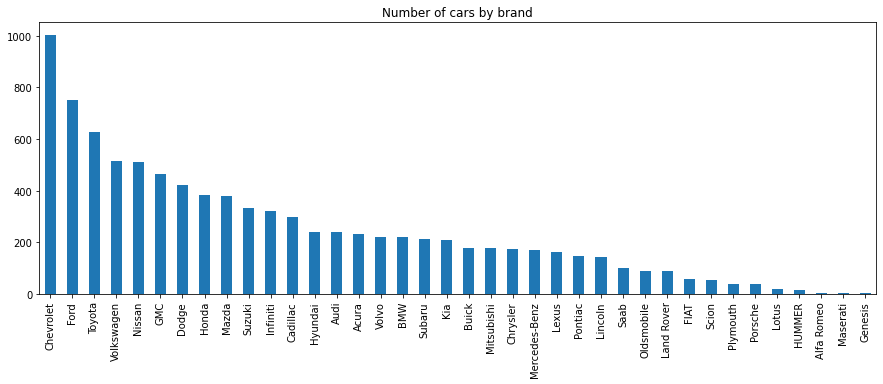

In [17]:
cars['Brand'].value_counts().plot(kind='bar', figsize=(15,5))
plt.title('Number of cars by brand')
plt.show()

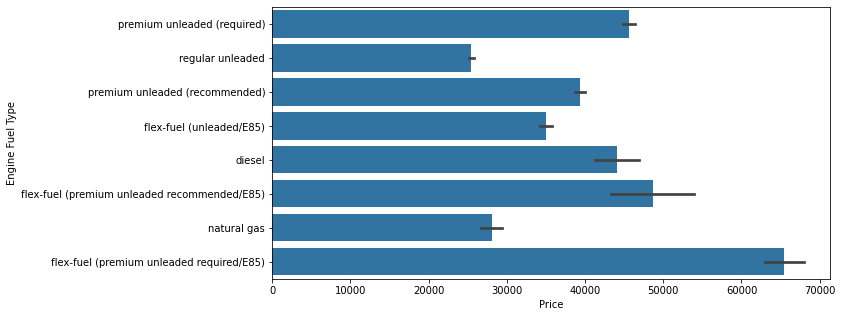

In [18]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Price', y = 'Engine Fuel Type', data = cars, color = 'tab:blue')
plt.show()

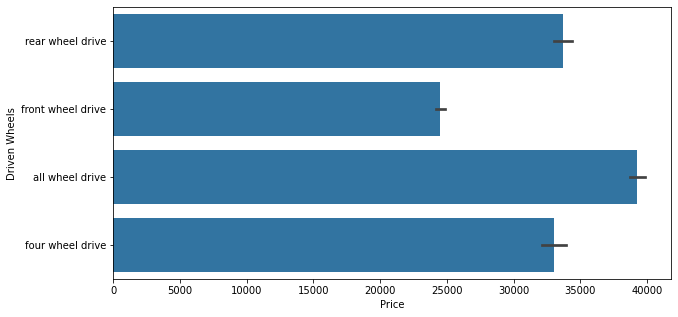

In [19]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Price', y = 'Driven Wheels', data = cars, color = 'tab:blue')
plt.show()

 As there is no difference beetween categories 'four wheel drive' and 'all wheel drive' they can be merged into one

In [20]:
cars.loc[(cars['Driven Wheels'] == 'four wheel drive'), 'Driven Wheels'] = 'all wheel drive'

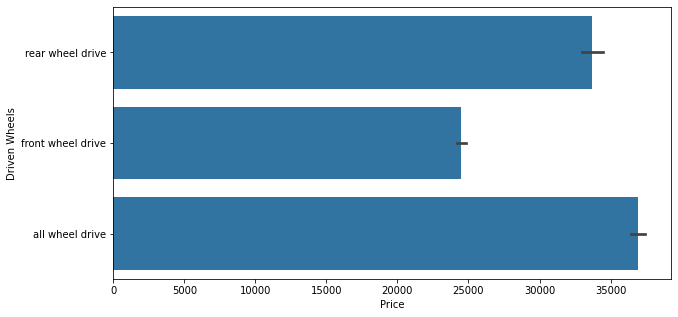

In [21]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Price', y = 'Driven Wheels', data = cars, color = 'tab:blue')
plt.show()

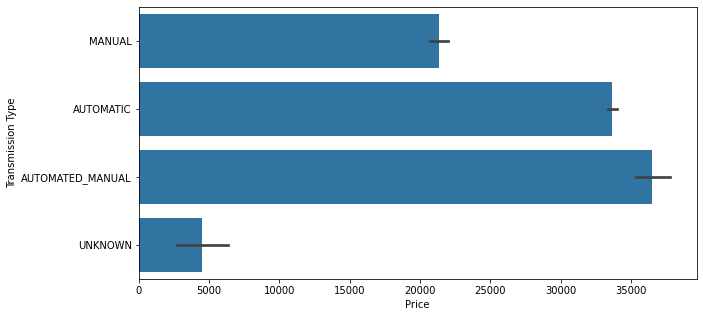

In [22]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Price', y = 'Transmission Type', data = cars, color = 'tab:blue')
plt.show()

Dealing with the 'UNKNOWN' transmission type

In [23]:
cars.loc[cars['Transmission Type'] == 'UNKNOWN']

,Brand,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Highway MPG,City MPG,Price
1289,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,29,19,2000
4691,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,23,15,6175
4692,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,23,15,8548
4693,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,23,15,9567
6158,GMC,Jimmy,1999,regular unleaded,190.0,6.0,UNKNOWN,rear wheel drive,19,14,2182
6160,GMC,Jimmy,1999,regular unleaded,190.0,6.0,UNKNOWN,all wheel drive,19,14,2317
6165,GMC,Jimmy,2000,regular unleaded,190.0,6.0,UNKNOWN,rear wheel drive,20,15,2407
6174,GMC,Jimmy,2000,regular unleaded,190.0,6.0,UNKNOWN,all wheel drive,18,14,2578


In [24]:
cars.drop(cars[cars['Transmission Type'] == 'UNKNOWN'].index, axis = 0, inplace = True)

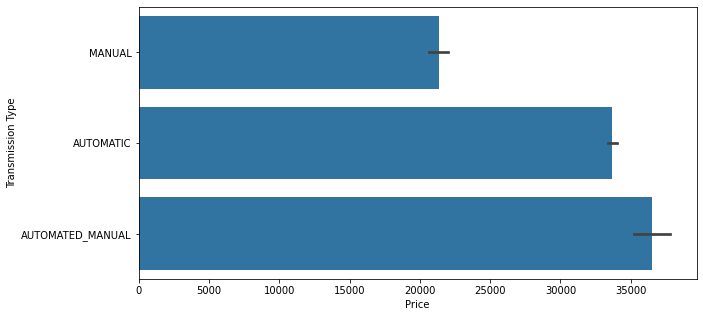

In [25]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Price', y = 'Transmission Type', data = cars, color = 'tab:blue')
plt.show()

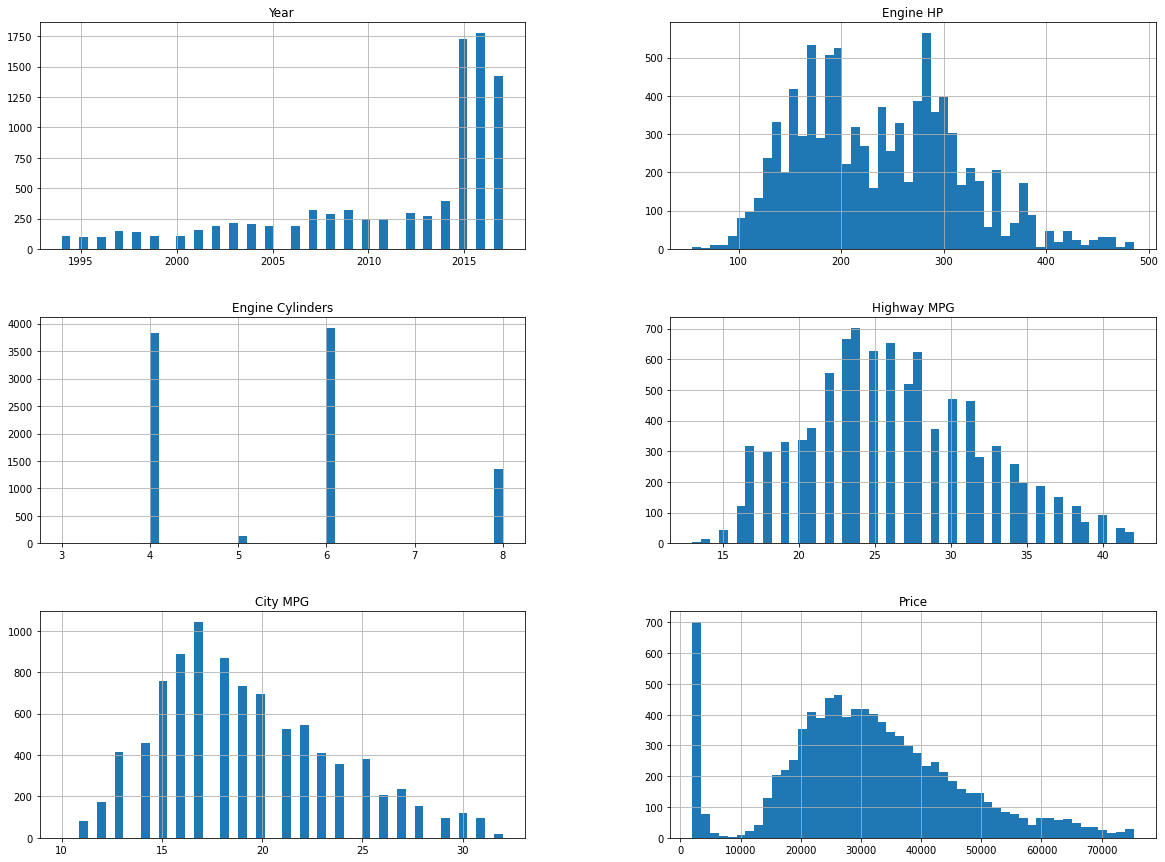

In [26]:
cars.hist(bins=50, figsize=(20,15))
plt.show()

In [27]:
cars.corr()['Price'].sort_values(ascending = False)

Price               1.000000
Engine HP           0.738283
Year                0.590711
Engine Cylinders    0.360365
Highway MPG        -0.115862
City MPG           -0.188557
Name: Price, dtype: float64

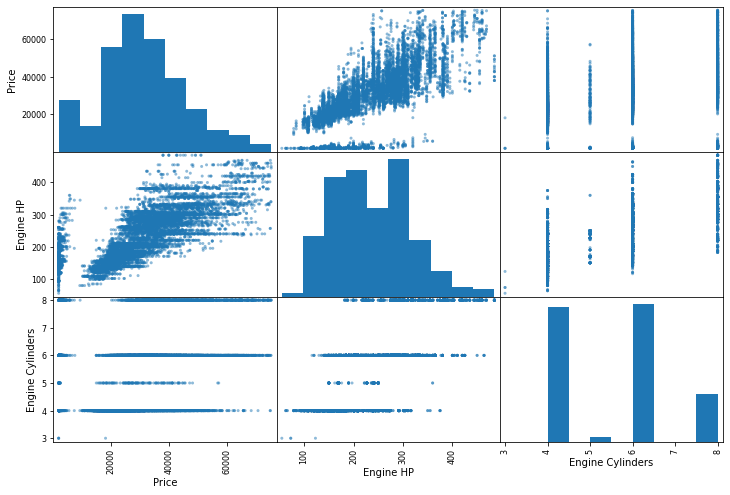

In [28]:
scatter_matrix(cars[['Price', 'Engine HP', 'Engine Cylinders']], figsize=(12,8))
plt.show()

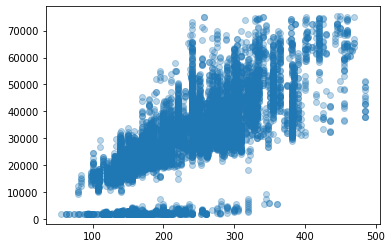

In [29]:
plt.scatter(cars['Engine HP'], cars['Price'], alpha = 0.3)
plt.show()

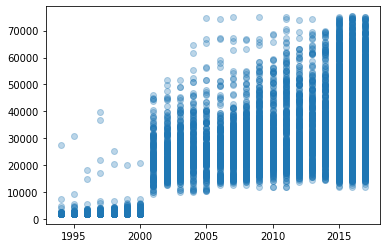

In [30]:
plt.scatter(cars['Year'], cars['Price'], alpha = 0.3)
plt.show()

Now the data is cleaned even better than before and we know which values are correlated with price

## 4. Preparing the data to be processed by machine learning algorithms

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### 4.1 Dealing with categorical features

In [32]:
cars_str_cols = cars.select_dtypes(include = 'object')
cars_num_cols = cars.select_dtypes(exclude = 'object')

cars_str_dummies = pd.get_dummies(cars_str_cols)

In [33]:
cars = pd.concat([cars_num_cols, cars_str_dummies], axis = 1)

In [34]:
cars.head()

,Year,Engine HP,Engine Cylinders,Highway MPG,City MPG,Price,Brand_Acura,Brand_Alfa Romeo,Brand_Audi,Brand_BMW,...,Engine Fuel Type_natural gas,Engine Fuel Type_premium unleaded (recommended),Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,Driven Wheels_all wheel drive,Driven Wheels_front wheel drive,Driven Wheels_rear wheel drive
0,2011,335.0,6.0,26,19,46135,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,2011,300.0,6.0,28,19,40650,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
2,2011,300.0,6.0,28,20,36350,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,2011,230.0,6.0,28,18,29450,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,2011,230.0,6.0,28,18,34500,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1


#### 4.2 Splitting the dataset

In [35]:
X = cars.drop(['Price'], axis = 1)
y = cars['Price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

#### 4.3 Scaling the dataset

In [37]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

## 5. Choosing thew most suitable model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

In [57]:
models = {
    'Linear Regression' : LinearRegression(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Ridge': Ridge(),
}

for name, model in models.items():
    model.fit(X_train_std, y_train)

In [58]:
for name, model in models.items():
    print(name + ' R^2 Score: {:.5f}'.format(model.score(X_test_std, y_test)))
    

Linear Regression R^2 Score: -15107523443293116071673856.00000
Elastic Net R^2 Score: 0.86327
Random Forest R^2 Score: 0.94255
Decision Tree R^2 Score: 0.92800
Ridge R^2 Score: 0.89022


In [59]:
from sklearn.metrics import mean_squared_error

def calc_rmse(model):
    
    model_predictions = model.predict(X_test_std)
    mse = mean_squared_error(y_test, model_predictions)
    rmse = np.sqrt(mse)
    return rmse

for name, model in models.items():
    print(name + ' RMSE: {:.2f}'.format(calc_rmse(model)))

Linear Regression RMSE: 58488082580676064.00
Elastic Net RMSE: 5564.16
Random Forest RMSE: 3606.72
Decision Tree RMSE: 4037.75
Ridge RMSE: 4985.87


Random Forest Regressor appears to be the most accurate model